In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
list_not_use = ['observed', 'location_details', 'title']
df = pd.read_csv("data/bfro_reports_geocoded.csv", parse_dates=['date'], usecols=lambda x:x not in list_not_use)
df.head()

,county,state,season,latitude,longitude,date,number,classification,geohash,temperature_high,...,precip_intensity,precip_probability,precip_type,pressure,summary,conditions,uv_index,visibility,wind_bearing,wind_speed
0,Washakie County,Wyoming,Summer,NaN,NaN,NaT,798.0,Class B,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wyoming County,West Virginia,Winter,37.58135,-81.29745,2005-12-03,13237.0,Class A,dnwjy13p0p,37.8,...,0.204,100.0,"['rain', 'snow']",1018.7,Partly cloudy throughout the day with late aft...,"Snow, Rain, Partially cloudy",NaN,9.3,168.1,17.1
2,Windsor County,Vermont,Fall,43.46540,-72.70510,2005-10-08,13285.0,Class A,drsr389u23,64.3,...,3.208,100.0,['rain'],1011.8,Cloudy skies throughout the day with a chance ...,"Rain, Overcast",NaN,5.0,356.2,7.6
3,Wythe County,Virginia,Spring,37.22647,-81.09017,1984-04-08,2285.0,Class A,dnw7f8zgyh,59.0,...,0.000,0.0,NaN,1020.9,Partly cloudy throughout the day.,Partially cloudy,NaN,13.0,107.3,11.5
4,Wood County,Texas,Winter,32.79430,-95.54250,1996-12-22,2048.0,Class A,9vu49fh0dk,75.3,...,NaN,0.0,NaN,NaN,Partly cloudy throughout the day.,Partially cloudy,NaN,10.5,180.4,20.8


### Analysis about the Dataset

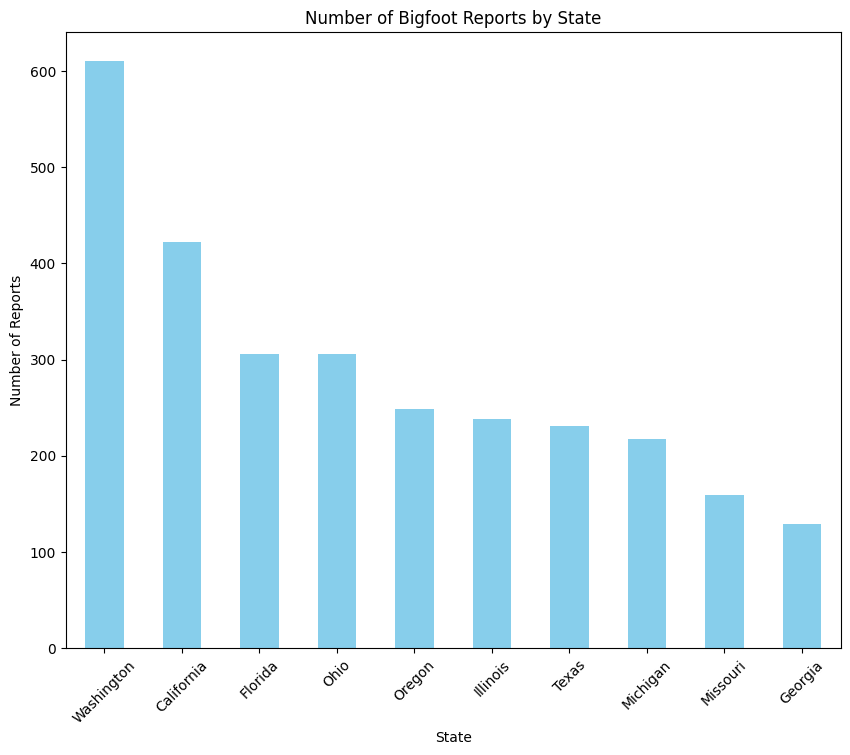

In [82]:
# Count of reports per state
state_counts = df['state'].value_counts().head(10)

fig, ax = plt.subplots()
# Bar plot for state counts
state_counts.plot(kind='bar', color='skyblue', figsize = (10,8))
ax.set_title('Number of Bigfoot Reports by State')
ax.set_xlabel('State')
ax.set_ylabel('Number of Reports')
ax.tick_params(axis='x', rotation=45)  # Rotate state labels for better readability

  
plt.show()

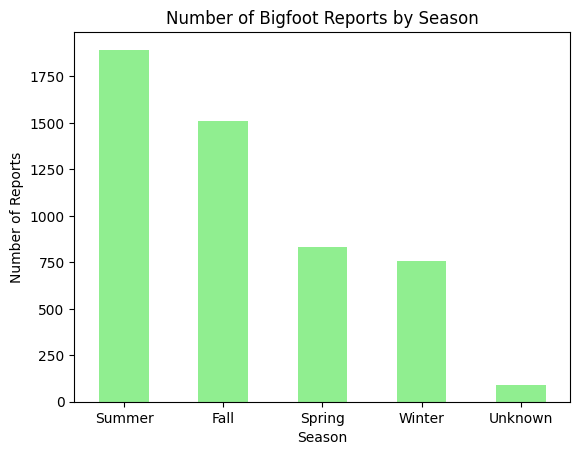

In [83]:
# Bar plot for season counts
season_counts = df['season'].value_counts()

season_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Bigfoot Reports by Season')
plt.xlabel('Season')
plt.ylabel('Number of Reports')
plt.xticks(rotation=0)

plt.show()

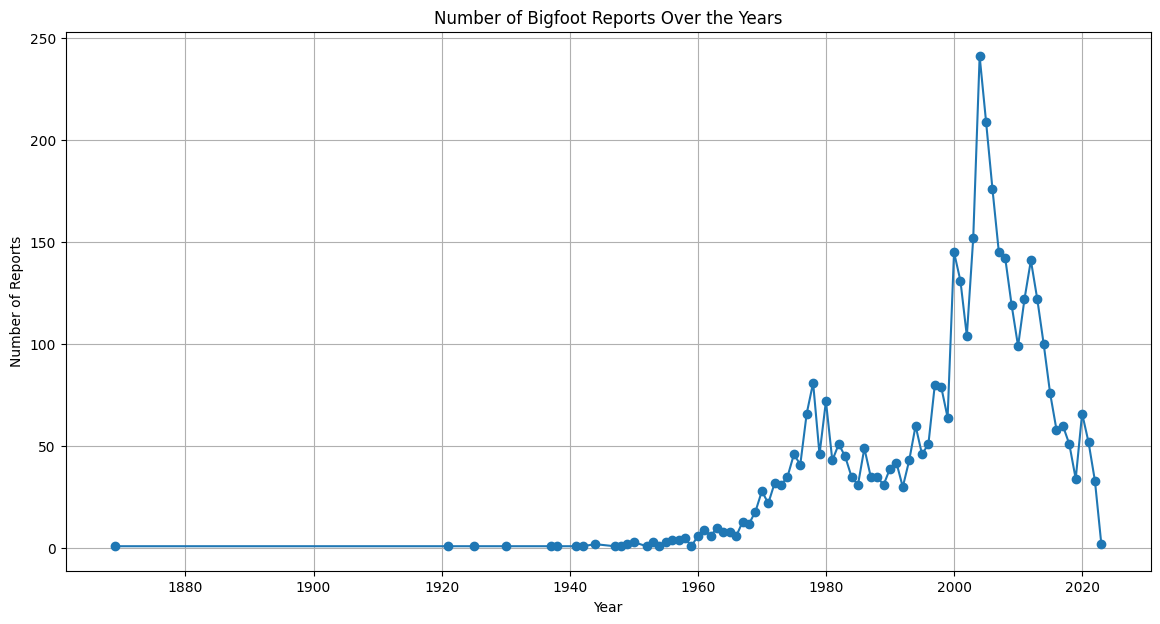

In [84]:

# Extract year from date and count reports per year
df['year'] = df['date'].dt.year
yearly_counts = df['year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(14, 7))
yearly_counts.plot(kind='line', marker='o', linestyle='-')
plt.title('Number of Bigfoot Reports Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.grid(True)
plt.show()

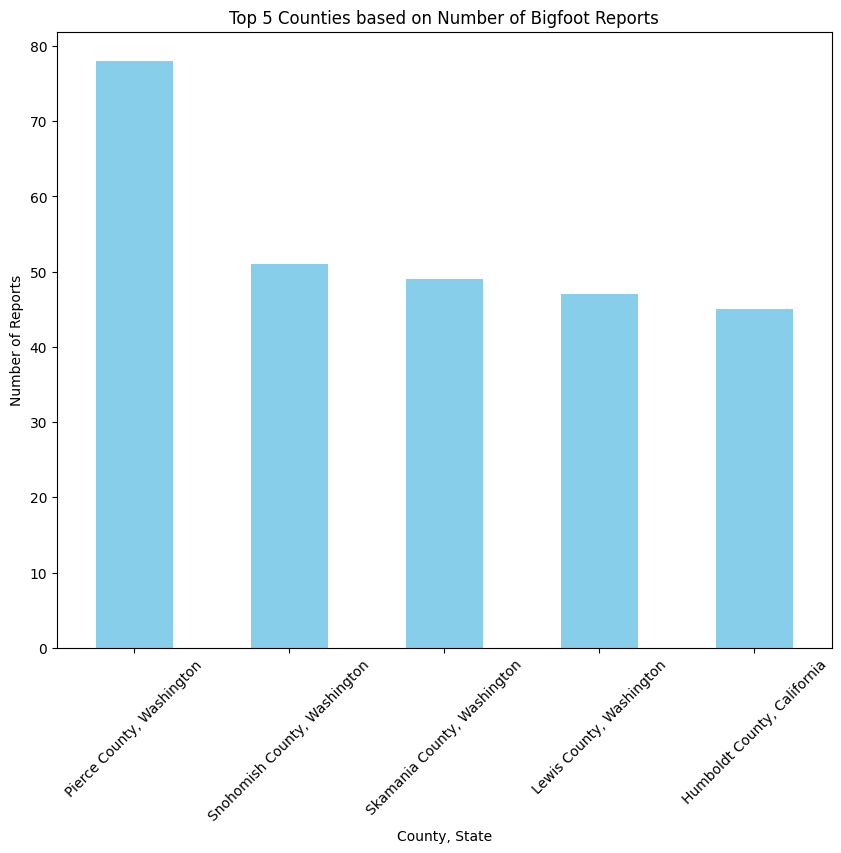

In [85]:
df['county_state'] = df['county'] + ', ' + df['state']

# 对这个新列进行计数，找出报告数量最多的前5个县
top_counties = df['county_state'].value_counts().head(5)

# 使用Matplotlib绘制条形图
top_counties.plot(kind='bar', color='skyblue', figsize=(10, 8))
plt.title('Top 5 Counties based on Number of Bigfoot Reports')
plt.xlabel('County, State')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.show()

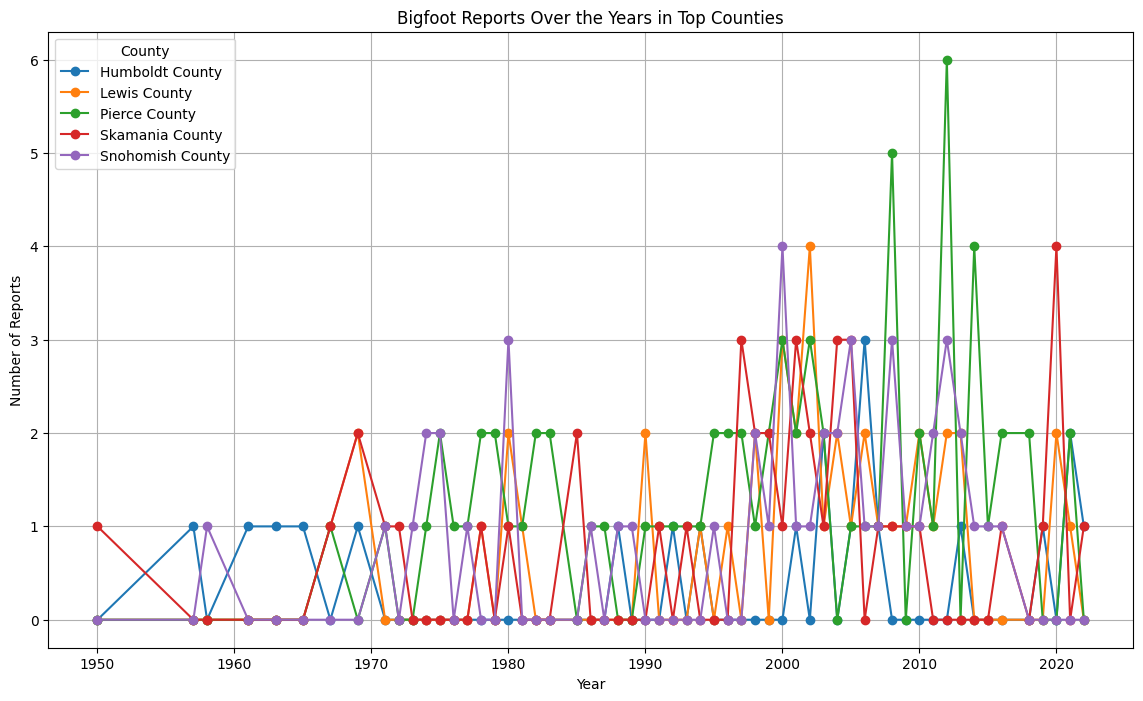

In [86]:
top_counties_data = df[df['county_state'].isin(top_counties.index)]

# 
if 'year' not in top_counties_data.columns:
    top_counties_data['year'] = pd.to_datetime(top_counties_data['date']).dt.year

# Group by year and county, then count the number of reports
yearly_reports_by_county = top_counties_data.groupby(['year', 'county']).size().unstack().fillna(0)

# Plotting the trends for the top counties
plt.figure(figsize=(14, 8))
for county in yearly_reports_by_county.columns:
    plt.plot(yearly_reports_by_county.index, yearly_reports_by_county[county], label=county, marker='o')

plt.title('Bigfoot Reports Over the Years in Top Counties')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.legend(title='County')
plt.grid(True)
plt.show()

### Install openpyxl

### Poverty Analysis

In [87]:

df_poverty= pd.read_excel('data/PovertyEstimates.xlsx', skiprows=4)

df_poverty.head()


,FIPS_Code,Stabr,Area_name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_ 2013,POVALL_2021,CI90LBALL_2021,CI90UBALL_2021,...,CI90UB517P_2021,MEDHHINC_2021,CI90LBINC_2021,CI90UBINC_2021,POV04_2021,CI90LB04_2021,CI90UB04_2021,PCTPOV04_2021,CI90LB04P_2021,CI90UB04P_2021
0,0,US,United States,NaN,NaN,NaN,NaN,41393176.0,41149497.0,41636855.0,...,16.3,69717.0,69583.0,69851.0,3349149.0,3299669.0,3398629.0,18.3,18.0,18.6
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,800848.0,782169.0,819527.0,...,22.5,53990.0,53218.0,54762.0,71220.0,66888.0,75552.0,25.1,23.6,26.6
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6296.0,4772.0,7820.0,...,20.4,66444.0,60061.0,72827.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,25526.0,21599.0,29453.0,...,18.5,65658.0,60723.0,70593.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,5089.0,3773.0,6405.0,...,44.6,38649.0,34308.0,42990.0,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Selecting relevant columns for analysis
df_poverty = df_poverty[['Stabr', 'Area_name', 'POVALL_2021', 'PCTPOVALL_2021']]

# Renaming columns for easier understanding and merging
df_poverty = df_poverty.rename(columns={
    'Stabr': 'state_abbreviation',
    'Area_name': 'county_or_state_name',
    'POVALL_2021': 'poverty_population',
    'PCTPOVALL_2021': 'poverty_rate in 2021'
})


In [89]:
# Grouping by 'state_abbreviation' and taking the first entry of each group
state_level_poverty_data = df_poverty.groupby('state_abbreviation').first().reset_index()

state_level_poverty_data = state_level_poverty_data.rename(columns={
    'county_or_state_name': 'State_Name'
})

# Display the state level poverty data
state_level_poverty_data.head()

,state_abbreviation,State_Name,poverty_population,poverty_rate in 2021
0,AK,Alaska,77736.0,10.8
1,AL,Alabama,800848.0,16.3
2,AR,Arkansas,471195.0,16.0
3,AZ,Arizona,919680.0,12.9
4,CA,California,4742405.0,12.3


In [90]:
state_report_counts = df['state'].value_counts().reset_index()
state_report_counts.head()


,state,count
0,Washington,610
1,California,422
2,Florida,306
3,Ohio,306
4,Oregon,249


In [91]:
# 计算每个州的Bigfoot目击报告数量
state_report_counts = state_report_counts.rename(columns={'count': 'report_count'})
state_level_poverty_data = state_level_poverty_data.rename(columns={'State_Name':'state'})
# Merging Bigfoot sightings data with the poverty data on state names
poverty_bigfoot_merged = pd.merge(state_report_counts, state_level_poverty_data, on='state', how='left')
poverty_bigfoot_merged.head()

,state,report_count,state_abbreviation,poverty_population,poverty_rate in 2021
0,Washington,610,WA,755589.0,9.9
1,California,422,CA,4742405.0,12.3
2,Florida,306,FL,2830813.0,13.2
3,Ohio,306,OH,1523366.0,13.3
4,Oregon,249,OR,507504.0,12.2


In [92]:
# Calculating the Pearson correlation coefficient for poverty percentage and poverty population with Bigfoot sightings
correlation_poverty_percentage = poverty_bigfoot_merged['poverty_rate in 2021'].corr(poverty_bigfoot_merged['report_count'])
correlation_poverty_population = poverty_bigfoot_merged['poverty_population'].corr(poverty_bigfoot_merged['report_count'])
correlation_poverty_percentage, correlation_poverty_population

(0.013313871359191747, 0.598586387728809)

### The correlation between poverty rate and Bigfoot sightings is approximately 0.0133, indicating almost no linear relationship. This suggests that there is no significant correlation between the poverty rate of a state and the number of Bigfoot sightings reported.

### The correlation between the impoverished population and Bigfoot sightings is approximately 0.5986, indicating a moderate to strong positive correlation. This may suggest that in states with larger populations, there are more Bigfoot sighting reports, possibly due to a wider geographical range and more resident activity.

### These findings suggest that the number of Bigfoot sightings may be more correlated with the population size of a state, rather than directly linked to economic poverty. The higher correlation with the impoverished population may reflect increased activity in larger states or areas with higher populations, thereby increasing opportunities for sighting reports.

## County Level

In [93]:

# Count Bigfoot sightings by county and sort to get the top 50 counties with the most sightings
counties_df = df['county_state'].value_counts().reset_index()
counties_df.columns = ['county', 'report_count']

counties_df = counties_df.rename(columns={'county':'county_state'})
counties_df.head()

,county_state,report_count
0,"Pierce County, Washington",78
1,"Snohomish County, Washington",51
2,"Skamania County, Washington",49
3,"Lewis County, Washington",47
4,"Humboldt County, California",45


In [94]:
df_poverty.head()

,state_abbreviation,county_or_state_name,poverty_population,poverty_rate in 2021
0,US,United States,41393176.0,12.8
1,AL,Alabama,800848.0,16.3
2,AL,Autauga County,6296.0,10.7
3,AL,Baldwin County,25526.0,10.8
4,AL,Barbour County,5089.0,23.0


In [95]:
df_poverty['State'] = None
df_poverty['County'] = None

current_state = ''  # 初始化当前州变量

# 遍历 df2 的每一行
for index, row in df_poverty.iterrows():
    location = row['county_or_state_name']
    if 'County' not in location:  # 如果这一行没有'County'，假设它是一个州名
        current_state = location  # 更新当前的州名
    else:
        # 如果有'County'，那么它是一个县名
        # 在当前行设置State和County的值
        df_poverty.loc[index, 'State'] = current_state
        df_poverty.loc[index, 'County'] = location

# 过滤出所有行，其中County列不为None，这将排除所有只表示州名的行
df_poverty = df_poverty[df_poverty['County'].notnull()]
df_poverty.head()

,state_abbreviation,county_or_state_name,poverty_population,poverty_rate in 2021,State,County
2,AL,Autauga County,6296.0,10.7,Alabama,Autauga County
3,AL,Baldwin County,25526.0,10.8,Alabama,Baldwin County
4,AL,Barbour County,5089.0,23.0,Alabama,Barbour County
5,AL,Bibb County,4204.0,20.6,Alabama,Bibb County
6,AL,Blount County,6992.0,12.0,Alabama,Blount County


In [96]:

# Re-merging using the 'county_state' to ensure accurate matching
df_poverty.loc[:, 'county_state'] = df_poverty['County'] + ', ' + df_poverty['State'] # Create a county_state column in the sightings data

# Merge using the updated county_state column
counties_merged = pd.merge(counties_df, df_poverty, on='county_state', how='left')

# Calculating the Pearson correlation coefficient for poverty percentage and poverty population with Bigfoot sightings

correlation_poverty_percentage = counties_merged['poverty_rate in 2021'].corr(counties_merged['report_count'])
correlation_poverty_population = counties_merged['poverty_population'].corr(counties_merged['report_count'])
correlations = (correlation_poverty_percentage, correlation_poverty_population)

correlations

(-0.05861960452094079, 0.13644708912213885)

### The correlation coefficient between the poverty rate and Bigfoot sightings is -0.0586:
### This value indicates a slight negative correlation between the poverty rate and the number of Bigfoot sightings. The negative value suggests that as the poverty rate increases, there is a slight decrease in the number of Bigfoot sighting reports, but the correlation is very weak, almost negligible. This suggests that the poverty rate itself has very limited impact on the number of Bigfoot sightings, and there may be other factors at play such as geographical location, forest coverage, and the frequency of outdoor activities by local residents.


### The correlation coefficient between the impoverished population and Bigfoot sightings is 0.1364:
### This value indicates a slight positive correlation between the impoverished population and the number of Bigfoot sightings. The positive value suggests that as the impoverished population increases, there is a slight increase in the number of Bigfoot sighting reports, but this correlation is also very weak. This may imply that in areas with larger populations, especially in economically disadvantaged areas, there may be more opportunities to report Bigfoot sightings due to higher population density or more frequent outdoor activities by people, which proves the conclusion when we analyze the state-level data

## Educational Level Analysis

In [97]:
df_education = pd.read_excel('data/Education (1).xlsx', skiprows=3)
df_education = df_education.rename(columns={'Area name':"county_or_state_name"})
df_education.head()

,Federal Information Processing Standard (FIPS) Code,State,county_or_state_name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2017-21","High school diploma only, 2017-21","Some college or associate's degree, 2017-21","Bachelor's degree or higher, 2017-21","Percent of adults with less than a high school diploma, 2017-21","Percent of adults with a high school diploma only, 2017-21","Percent of adults completing some college or associate's degree, 2017-21","Percent of adults with a bachelor's degree or higher, 2017-21"
0,0,US,United States,NaN,NaN,NaN,NaN,52373312.0,34158051.0,11650730.0,...,28.993579,28.484955,25050356.0,59636386.0,64656741.0,75808834.0,11.125960,26.487130,28.716889,33.670022
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,...,29.022866,22.264896,430047.0,1041209.0,1032122.0,910425.0,12.597300,30.499973,30.233789,26.668938
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,29.618142,21.707831,4126.0,12977.0,11367.0,11144.0,10.415510,32.758621,28.694401,28.131469
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,...,31.819503,27.741591,14555.0,44342.0,50518.0,52562.0,8.985844,27.375492,31.188379,32.450286
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,25.771784,14.524286,4378.0,6600.0,5010.0,2007.0,24.328980,36.676855,27.841067,11.153098


In [98]:

state_college_level_education_data = df_education.groupby('State').first().reset_index()


state_college_level_education_data = state_college_level_education_data[['county_or_state_name', 'Percent of adults completing four years of college or higher, 1970',
'Percent of adults completing four years of college or higher, 1980', 'Percent of adults with a bachelor\'s degree or higher, 1990',
'Percent of adults with a bachelor\'s degree or higher, 2000', 'Percent of adults with a bachelor\'s degree or higher, 2008-12',
'Percent of adults with a bachelor\'s degree or higher, 2017-21']]

state_college_level_education_data = state_college_level_education_data.rename(columns={'county_or_state_name':'state','Percent of adults completing four years of college or higher, 1970':'1970', 'Percent of adults completing four years of college or higher, 1980':'1980', 'Percent of adults with a bachelor\'s degree or higher, 1990':'1990', 'Percent of adults with a bachelor\'s degree or higher, 2000': '2000', 'Percent of adults with a bachelor\'s degree or higher, 2008-12':'2008-12', 'Percent of adults with a bachelor\'s degree or higher, 2017-21':'2017-21'})

state_college_level_education_data.head()

,state,1970,1980,1990,2000,2008-12,2017-21
0,Alaska,14.1,21.1,23.0,24.7,27.476243,30.593829
1,Alabama,7.8,12.2,15.7,19.0,22.264896,26.668938
2,Arkansas,6.7,10.8,13.3,16.7,19.798349,24.304726
3,Arizona,12.6,17.4,20.3,23.5,26.629277,31.206465
4,California,13.4,19.6,23.4,26.6,30.453450,35.270416


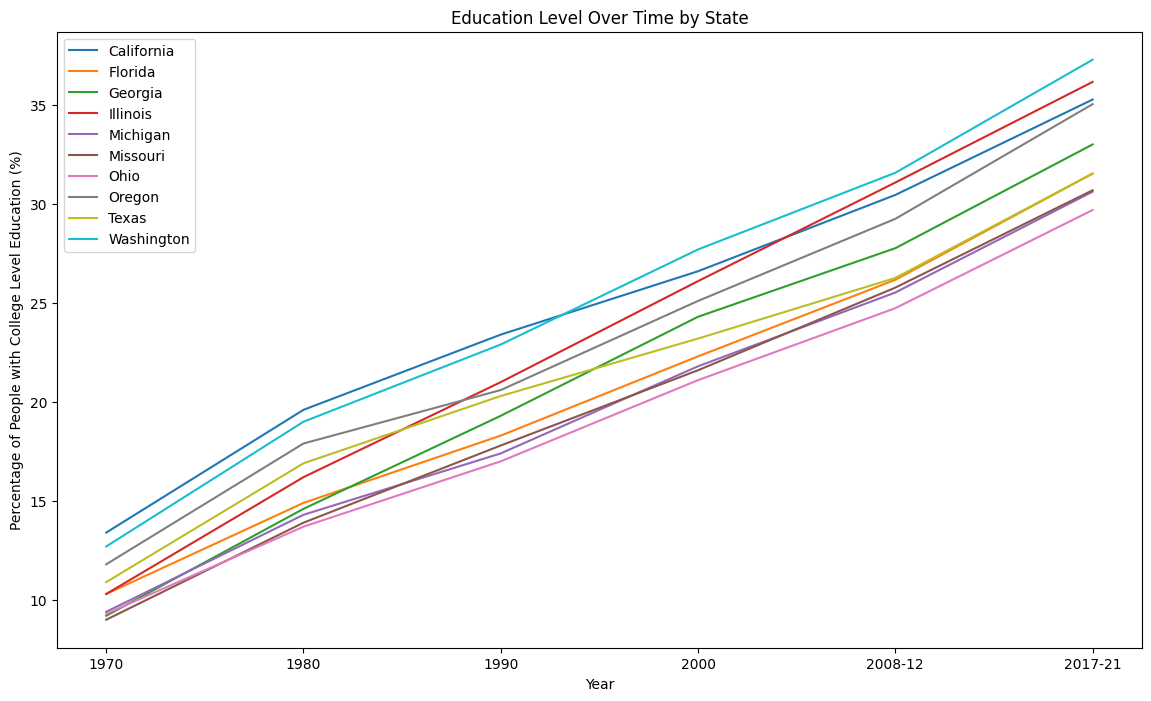

In [99]:
state_counts = df['state'].value_counts().head(10)
plt.figure(figsize=(14, 8))

# 对每一个州，绘制教育程度的变化
for index, row in state_college_level_education_data.iterrows():
    if row['state'] in state_counts.index:
        plt.plot(row.index[1:], row.values[1:], label=row['state'])

# 添加图例
plt.legend()

# 设置标题和坐标轴标签
plt.title('Education Level Over Time by State')
plt.xlabel('Year')
plt.ylabel('Percentage of People with College Level Education (%)')

# 显示图形
plt.show()


In [100]:
education_bigfoot_merged = pd.merge(state_report_counts, state_college_level_education_data, on='state', how='left')
education_bigfoot_merged.head()

,state,report_count,1970,1980,1990,2000,2008-12,2017-21
0,Washington,610,12.7,19.0,22.9,27.7,31.572242,37.282397
1,California,422,13.4,19.6,23.4,26.6,30.453450,35.270416
2,Florida,306,10.3,14.9,18.3,22.3,26.167500,31.532116
3,Ohio,306,9.3,13.7,17.0,21.1,24.733871,29.691649
4,Oregon,249,11.8,17.9,20.6,25.1,29.245717,35.037201


In [101]:
# 定义一个函数，用于基于年份判断年代
def get_decade(year):
    if 1970 <= year < 1980:
        return '1970'
    elif 1980 <= year < 1990:
        return '1980'
    elif 1990 <= year <= 2000:
        return '1990'
    elif 2000 <= year < 2008:
        return '2000'
    elif 2008 <= year < 2012:
        return '2008-12'
    elif 2017 <= year < 2021:
        return '2017-21'

# 应用这个函数，创建一个新列来表示年代
df['Decade'] = df['date'].dt.year.apply(get_decade)

# 汇总每个州在每个年代的目击次数
decade_counts = df.groupby(['state', 'Decade']).size().reset_index(name='Sightings')

# 调整格式，使得每个州成为一行，列为各个年代，值为目击次数
decade_counts_pivot = decade_counts.pivot_table(index='state', columns='Decade', values='Sightings', fill_value=0).reset_index()

decade_counts_pivot.head()


Decade,state,1970,1980,1990,2000,2008-12,2017-21
0,Alabama,5.0,7.0,15.0,26.0,9.0,2.0
1,Alaska,0.0,0.0,2.0,6.0,3.0,0.0
2,Arizona,3.0,6.0,11.0,23.0,10.0,0.0
3,Arkansas,11.0,11.0,16.0,31.0,10.0,4.0
4,California,28.0,32.0,52.0,95.0,30.0,7.0


In [102]:
# 选择要计算相关系数的列
Year_list = ['1970', '1980', '1990', '2000', '2008-12', '2017-21']
correlation_dict = {}

for year in Year_list:
    # 从两个DataFrame中选择相应的列
    column_df1 = decade_counts_pivot[year]
    column_df2 = education_bigfoot_merged[year]
    
    # 计算相关系数
    correlation = column_df1.corr(column_df2)
    
    # 将相关系数存储在字典中
    correlation_dict[year] = correlation

correlation_dict

{'1970': -0.06334803143018096,
 '1980': -0.08916521570891107,
 '1990': -0.07073448568435994,
 '2000': 0.018015165869618474,
 '2008-12': -0.08013596864034729,
 '2017-21': 0.013796275141288637}

## County Level

In [103]:
df_education['State'] = None
df_education['County'] = None

current_state = ''  # 初始化当前州变量

# 遍历 df2 的每一行
for index, row in df_education.iterrows():
    location = row['county_or_state_name']
    if 'County' not in location:  # 如果这一行没有'County'，假设它是一个州名
        current_state = location  # 更新当前的州名
    else:
        # 如果有'County'，那么它是一个县名
        # 在当前行设置State和County的值
        df_education.loc[index, 'State'] = current_state
        df_education.loc[index, 'County'] = location

# 过滤出所有行，其中County列不为None，这将排除所有只表示州名的行
df_education = df_education[df_education['County'].notnull()]
df_education.head()

,Federal Information Processing Standard (FIPS) Code,State,county_or_state_name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2017-21","High school diploma only, 2017-21","Some college or associate's degree, 2017-21","Bachelor's degree or higher, 2017-21","Percent of adults with less than a high school diploma, 2017-21","Percent of adults with a high school diploma only, 2017-21","Percent of adults completing some college or associate's degree, 2017-21","Percent of adults with a bachelor's degree or higher, 2017-21",County
2,1001,Alabama,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,21.707831,4126.0,12977.0,11367.0,11144.0,10.415510,32.758621,28.694401,28.131469,Autauga County
3,1003,Alabama,Baldwin County,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,...,27.741591,14555.0,44342.0,50518.0,52562.0,8.985844,27.375492,31.188379,32.450286,Baldwin County
4,1005,Alabama,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,14.524286,4378.0,6600.0,5010.0,2007.0,24.328980,36.676855,27.841067,11.153098,Barbour County
5,1007,Alabama,Bibb County,1.0,1.0,1.0,1.0,5272.0,1402.0,238.0,...,8.996005,3125.0,7052.0,3967.0,1913.0,19.461917,43.918540,24.705736,11.913807,Bibb County
6,1009,Alabama,Blount County,1.0,1.0,1.0,1.0,10677.0,3440.0,626.0,...,12.381469,6650.0,14284.0,13673.0,6061.0,16.351923,35.123439,33.621029,14.903610,Blount County


In [104]:
county_college_level_education_data = df_education[['State', 'county_or_state_name', 'Percent of adults completing four years of college or higher, 1970',
'Percent of adults completing four years of college or higher, 1980', 'Percent of adults with a bachelor\'s degree or higher, 1990',
'Percent of adults with a bachelor\'s degree or higher, 2000', 'Percent of adults with a bachelor\'s degree or higher, 2008-12',
'Percent of adults with a bachelor\'s degree or higher, 2017-21']]

county_college_level_education_data = county_college_level_education_data.rename(columns={'county_or_state_name':'County','Percent of adults completing four years of college or higher, 1970':'1970', 'Percent of adults completing four years of college or higher, 1980':'1980', 'Percent of adults with a bachelor\'s degree or higher, 1990':'1990', 'Percent of adults with a bachelor\'s degree or higher, 2000': '2000', 'Percent of adults with a bachelor\'s degree or higher, 2008-12':'2008-12', 'Percent of adults with a bachelor\'s degree or higher, 2017-21':'2017-21'})

county_college_level_education_data.loc[:, 'county_state'] = county_college_level_education_data['County'] + ', ' + county_college_level_education_data['State']

county_college_level_education_data = county_college_level_education_data[['county_state', '1970', '1980', '1990', '2000', '2008-12', '2017-21']]

county_college_level_education_data.head()

,county_state,1970,1980,1990,2000,2008-12,2017-21
2,"Autauga County, Alabama",6.4,12.1,14.5,18.0,21.707831,28.131469
3,"Baldwin County, Alabama",6.5,12.1,16.8,23.1,27.741591,32.450286
4,"Barbour County, Alabama",7.3,9.2,11.8,10.9,14.524286,11.153098
5,"Bibb County, Alabama",4.2,4.9,4.7,7.1,8.996005,11.913807
6,"Blount County, Alabama",2.7,5.3,7.0,9.6,12.381469,14.903610


In [105]:
county_decade_counts = df.groupby(['county_state', 'Decade']).size().reset_index(name='Sightings')

# 调整格式，使得每个州成为一行，列为各个年代，值为目击次数
county_decade_counts = county_decade_counts.pivot_table(index='county_state', columns='Decade',values='Sightings', fill_value=0).reset_index()

county_decade_counts.head()

Decade,county_state,1970,1980,1990,2000,2008-12,2017-21
0,"Accomack County, Virginia",0.0,0.0,0.0,1.0,0.0,0.0
1,"Adams County, Idaho",0.0,0.0,1.0,0.0,1.0,0.0
2,"Adams County, Illinois",1.0,0.0,0.0,0.0,0.0,0.0
3,"Adams County, Ohio",0.0,1.0,1.0,1.0,1.0,1.0
4,"Adams County, Wisconsin",0.0,0.0,1.0,0.0,0.0,0.0


In [106]:
county_list = county_decade_counts['county_state'].to_list()

filtered_education_data = county_college_level_education_data[county_college_level_education_data['county_state'].isin(county_list)]
filtered_education_data.head()

,county_state,1970,1980,1990,2000,2008-12,2017-21
2,"Autauga County, Alabama",6.4,12.1,14.5,18.0,21.707831,28.131469
3,"Baldwin County, Alabama",6.5,12.1,16.8,23.1,27.741591,32.450286
4,"Barbour County, Alabama",7.3,9.2,11.8,10.9,14.524286,11.153098
5,"Bibb County, Alabama",4.2,4.9,4.7,7.1,8.996005,11.913807
6,"Blount County, Alabama",2.7,5.3,7.0,9.6,12.381469,14.903610


In [107]:
Year_list = ['1970', '1980', '1990', '2000', '2008-12', '2017-21']
education_correlation_dict = {}

for year in Year_list:
    # 从两个DataFrame中选择相应的列
    column_df1 = county_decade_counts[year]
    column_df2 = filtered_education_data[year]
    
    # 计算相关系数
    education_correlation = column_df1.corr(column_df2)
    
    # 将相关系数存储在字典中
    education_correlation_dict[year] = education_correlation

education_correlation_dict

{'1970': 0.007369002273517016,
 '1980': -0.0491917461589685,
 '1990': 0.029707171672789988,
 '2000': 0.03937269571849243,
 '2008-12': 0.07701732209888675,
 '2017-21': 0.05534335845797725}

# Unemployment Analysis

In [108]:
import re

file_path = 'data/Unemployment (1).xlsx'
column_pattern = r'^Unemployment_rate'  # 匹配以'Unemployment_rate'开头的列名

# 第一次读取文件获取列名
all_columns = pd.read_excel(file_path, nrows=1, skiprows=4).columns

# 使用正则表达式筛选以'Unemployment_rate'开头的列名
selected_columns_with_pattern = [col for col in all_columns if re.match(column_pattern, col)]

# 手动选择不需要正则匹配的列名
manual_selected_columns = ['Area_Name']

# 合并所需的列名列表
selected_columns = manual_selected_columns + selected_columns_with_pattern 

# 第二次读取文件并指定需要的列名列表
df_unemployment = pd.read_excel(file_path, usecols=selected_columns, skiprows=4)

df_unemployment

,Area_Name,Unemployment_rate_2000,Unemployment_rate_2001,Unemployment_rate_2002,Unemployment_rate_2003,Unemployment_rate_2004,Unemployment_rate_2005,Unemployment_rate_2006,Unemployment_rate_2007,Unemployment_rate_2008,...,Unemployment_rate_2013,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019,Unemployment_rate_2020,Unemployment_rate_2021,Unemployment_rate_2022
0,United States,4.0,4.7,5.8,6.0,5.5,5.1,4.6,4.6,5.8,...,7.4,6.2,5.3,4.9,4.4,3.9,3.7,8.1,5.4,3.7
1,Alabama,4.6,5.2,5.9,6.0,5.6,4.4,4.0,4.1,5.8,...,7.3,6.7,6.1,5.9,4.5,3.9,3.2,6.4,3.4,2.6
2,"Autauga County, AL",4.1,4.1,4.8,5.0,4.7,3.8,3.3,3.4,5.3,...,6.3,5.8,5.2,5.1,4.0,3.6,2.9,5.3,2.8,2.3
3,"Baldwin County, AL",3.7,4.3,5.0,4.9,5.1,4.0,3.2,3.2,4.8,...,6.7,6.1,5.6,5.4,4.2,3.6,2.9,6.1,2.9,2.4
4,"Barbour County, AL",5.6,7.6,7.7,7.1,7.1,5.7,5.6,6.4,9.1,...,10.4,10.5,8.9,8.4,6.0,5.1,4.0,7.7,5.5,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,"Vega Baja Municipio, PR",11.1,12.4,12.9,13.3,11.6,12.6,11.9,12.6,13.2,...,16.5,16.2,13.7,13.9,12.4,10.4,9.6,NaN,10.0,7.4
3273,"Vieques Municipio, PR",13.2,13.9,17.8,16.1,12.4,11.0,9.3,10.9,12.5,...,15.9,14.0,11.3,10.6,14.5,16.5,7.2,NaN,11.9,6.9
3274,"Villalba Municipio, PR",12.9,13.5,15.8,15.0,12.8,14.7,13.1,13.3,13.8,...,21.6,21.8,19.7,20.2,19.4,15.8,15.8,NaN,11.7,10.4
3275,"Yabucoa Municipio, PR",15.2,18.6,19.9,19.6,17.2,17.6,16.6,18.2,18.1,...,23.9,21.7,17.4,16.9,16.5,14.3,13.1,NaN,10.3,8.3


In [109]:
df_unemployment['State'] = None
df_unemployment['County'] = None

current_state = ''  # 初始化当前州变量

# 遍历 df2 的每一行
for index, row in df_unemployment.iterrows():
    location = row['Area_Name']
    if 'County' not in location:  # 如果这一行没有'County'，假设它是一个州名
        current_state = location  # 更新当前的州名
    else:
        # 如果有'County'，那么它是一个县名
        # 在当前行设置State和County的值
        df_unemployment.loc[index, 'State'] = current_state
        df_unemployment.loc[index, 'County'] = location

# 过滤出所有行，其中County列不为None，这将排除所有只表示州名的行
df_unemployment = df_unemployment[df_unemployment['County'].notnull()]
df_unemployment.head()

,Area_Name,Unemployment_rate_2000,Unemployment_rate_2001,Unemployment_rate_2002,Unemployment_rate_2003,Unemployment_rate_2004,Unemployment_rate_2005,Unemployment_rate_2006,Unemployment_rate_2007,Unemployment_rate_2008,...,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019,Unemployment_rate_2020,Unemployment_rate_2021,Unemployment_rate_2022,State,County
2,"Autauga County, AL",4.1,4.1,4.8,5.0,4.7,3.8,3.3,3.4,5.3,...,5.2,5.1,4.0,3.6,2.9,5.3,2.8,2.3,Alabama,"Autauga County, AL"
3,"Baldwin County, AL",3.7,4.3,5.0,4.9,5.1,4.0,3.2,3.2,4.8,...,5.6,5.4,4.2,3.6,2.9,6.1,2.9,2.4,Alabama,"Baldwin County, AL"
4,"Barbour County, AL",5.6,7.6,7.7,7.1,7.1,5.7,5.6,6.4,9.1,...,8.9,8.4,6.0,5.1,4.0,7.7,5.5,4.1,Alabama,"Barbour County, AL"
5,"Bibb County, AL",5.4,6.8,7.0,5.9,5.4,4.4,4.2,4.2,6.0,...,6.7,6.5,4.5,4.0,3.3,7.3,3.4,2.5,Alabama,"Bibb County, AL"
6,"Blount County, AL",3.5,3.7,5.4,4.6,4.1,3.6,3.2,3.2,4.8,...,5.4,5.4,4.1,3.5,2.8,4.5,2.4,2.2,Alabama,"Blount County, AL"


In [110]:
df_unemployment['County'] = df_unemployment['County'].str.split(',').str[0]

# 添加第一列的州全称到新的县名后面
df_unemployment['county_state'] = df_unemployment['County'] + ', ' + df_unemployment['State']

# Regex to match 'county' exactly or names starting with 'unemployment'
filtered_df = df_unemployment.loc[:, df_unemployment.columns.str.match('^county_state$|^Unemployment.*')]

filtered_df.head()

C:\Users\chang\AppData\Local\Temp\ipykernel_22628\984991112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unemployment['County'] = df_unemployment['County'].str.split(',').str[0]
C:\Users\chang\AppData\Local\Temp\ipykernel_22628\984991112.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unemployment['county_state'] = df_unemployment['County'] + ', ' + df_unemployment['State']


,Unemployment_rate_2000,Unemployment_rate_2001,Unemployment_rate_2002,Unemployment_rate_2003,Unemployment_rate_2004,Unemployment_rate_2005,Unemployment_rate_2006,Unemployment_rate_2007,Unemployment_rate_2008,Unemployment_rate_2009,...,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019,Unemployment_rate_2020,Unemployment_rate_2021,Unemployment_rate_2022,county_state
2,4.1,4.1,4.8,5.0,4.7,3.8,3.3,3.4,5.3,8.9,...,5.8,5.2,5.1,4.0,3.6,2.9,5.3,2.8,2.3,"Autauga County, Alabama"
3,3.7,4.3,5.0,4.9,5.1,4.0,3.2,3.2,4.8,8.9,...,6.1,5.6,5.4,4.2,3.6,2.9,6.1,2.9,2.4,"Baldwin County, Alabama"
4,5.6,7.6,7.7,7.1,7.1,5.7,5.6,6.4,9.1,13.2,...,10.5,8.9,8.4,6.0,5.1,4.0,7.7,5.5,4.1,"Barbour County, Alabama"
5,5.4,6.8,7.0,5.9,5.4,4.4,4.2,4.2,6.0,12.2,...,7.2,6.7,6.5,4.5,4.0,3.3,7.3,3.4,2.5,"Bibb County, Alabama"
6,3.5,3.7,5.4,4.6,4.1,3.6,3.2,3.2,4.8,9.2,...,6.1,5.4,5.4,4.1,3.5,2.8,4.5,2.4,2.2,"Blount County, Alabama"


In [111]:
columns = list(filtered_df.columns)

# Move 'county' to the beginning of the list
columns.insert(0, columns.pop(columns.index('county_state')))  # Remove 'county_state' and reinsert it at the front

# Reorder DataFrame columns using the modified list
county_unemployment_rate = filtered_df[columns]

# Renaming the columns to match bigfoot sightseeing table
county_unemployment_rate.columns = [col.replace('Unemployment_rate_', '') for col in county_unemployment_rate.columns]

# Convert all columns except 'county_state' column to integer
for col in county_unemployment_rate.columns[1:]:
    # Fill missing values with 0 and then convert to int
    county_unemployment_rate[col] = county_unemployment_rate[col].fillna(0).astype(int)

# Print the DataFrame with integer columns
county_unemployment_rate.head()

,county_state,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,"Autauga County, Alabama",4,4,4,5,4,3,3,3,5,...,6,5,5,5,4,3,2,5,2,2
3,"Baldwin County, Alabama",3,4,5,4,5,4,3,3,4,...,6,6,5,5,4,3,2,6,2,2
4,"Barbour County, Alabama",5,7,7,7,7,5,5,6,9,...,10,10,8,8,6,5,4,7,5,4
5,"Bibb County, Alabama",5,6,7,5,5,4,4,4,6,...,8,7,6,6,4,4,3,7,3,2
6,"Blount County, Alabama",3,3,5,4,4,3,3,3,4,...,6,6,5,5,4,3,2,4,2,2


In [112]:
df['year'] = pd.to_datetime(df['date']).dt.year

In [113]:
filter_df = df[df['year'].between(2000, 2022)].copy()
filter_df['year'] = filter_df['year'].astype(int)

filter_df['year'] = filter_df['year'].astype(str)

In [114]:
# This will create a new DataFrame with the count of sightings for each county each year

sightings_count = filter_df.groupby(['year', 'county_state']).size().reset_index(name='count')
county_year_counts = sightings_count.pivot_table(index='county_state', columns='year', values='count', fill_value=0).reset_index()

county_year_counts.head()


year,county_state,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Accomack County, Virginia",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Adams County, Idaho",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Adams County, Illinois",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Adams County, Ohio",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,"Adams County, Wisconsin",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
county_year_list = county_year_counts['county_state'].to_list()

filtered_unemployment_data = county_unemployment_rate[county_unemployment_rate['county_state'].isin(county_year_list)]
filtered_unemployment_data.head()

,county_state,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,"Baldwin County, Alabama",3,4,5,4,5,4,3,3,4,...,6,6,5,5,4,3,2,6,2,2
5,"Bibb County, Alabama",5,6,7,5,5,4,4,4,6,...,8,7,6,6,4,4,3,7,3,2
6,"Blount County, Alabama",3,3,5,4,4,3,3,3,4,...,6,6,5,5,4,3,2,4,2,2
11,"Cherokee County, Alabama",4,4,4,4,4,4,4,4,5,...,6,5,5,5,4,3,3,5,2,2
12,"Chilton County, Alabama",4,4,5,5,4,3,3,3,5,...,6,6,5,5,4,3,2,5,2,2


In [116]:
unemployment_correlation_dict = {}
for year in range(2000, 2023):  
    year = str(year)
    unemployment_correlation_dict[year] = county_year_counts[year].corr(filtered_unemployment_data[year])


unemployment_correlation_df = pd.DataFrame(list(unemployment_correlation_dict.items()), columns=['Year', 'Correlation'])
unemployment_correlation_df

,Year,Correlation
0,2000,0.027143
1,2001,0.023242
2,2002,-0.067947
3,2003,0.021138
4,2004,-0.088319
5,2005,-0.000282
6,2006,-0.063884
7,2007,0.025402
8,2008,0.006694
9,2009,0.010557


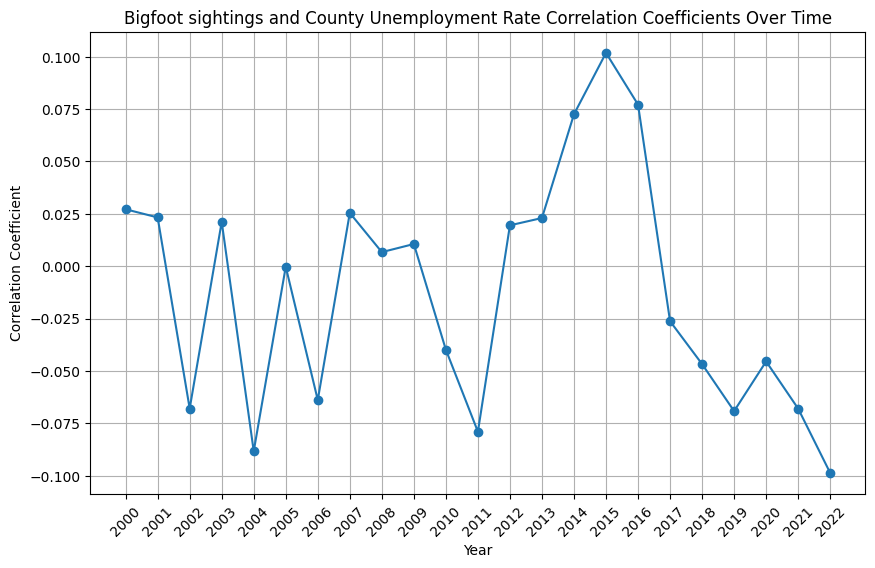

In [117]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(unemployment_correlation_df['Year'], unemployment_correlation_df['Correlation'], marker='o')  # Create a line plot
plt.title('Bigfoot sightings and County Unemployment Rate Correlation Coefficients Over Time')  # Add a title
plt.xlabel('Year')  # Label the x-axis
plt.ylabel('Correlation Coefficient')  # Label the y-axis
plt.grid(True)  # Add a grid
plt.xticks(rotation=45)
plt.show()  # Display the plot


In [118]:
unemployment_correlation_df['Abs_Correlation'] = unemployment_correlation_df['Correlation'].abs()
sorted_df = unemployment_correlation_df.sort_values(by='Abs_Correlation', ascending=False)
top_5_corr = sorted_df.head(5)
top_5_corr

,Year,Correlation,Abs_Correlation
15,2015,0.101769,0.101769
22,2022,-0.098666,0.098666
4,2004,-0.088319,0.088319
11,2011,-0.079013,0.079013
16,2016,0.077095,0.077095


### There are years like 2015 (0.101769) and 2016 (0.077095) where the correlation is moderately positive. This suggests that during these years, higher unemployment rates might correlate with more reported sightings of Bigfoot. Higher unemployment might result in more people spending time outdoors, potentially leading to more sightings.

### However, the fluctuations between positive and negative correlations from year to year indicate that the relationship between Bigfoot sightings and unemployment is complex and possibly influenced by many factors. It suggests that no straightforward, consistent trend exists across all years.